# 1. Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 2. Load Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

# 3. Clean the dataset

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.drop('CustomerID',axis=1, inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Converting Categorical Value

In [6]:
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])

In [7]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1d43706d850>,
 'caps': [<matplotlib.lines.Line2D at 0x1d43706de80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d43706d580>],
 'medians': [<matplotlib.lines.Line2D at 0x1d43706e450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d43706e750>],
 'means': []}

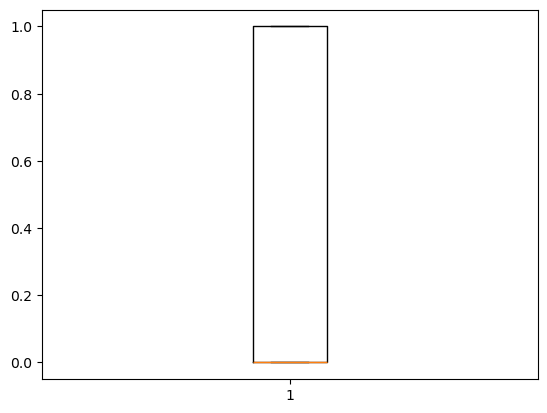

In [8]:
plt.boxplot(df['Gender'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d43716b500>,
 'caps': [<matplotlib.lines.Line2D at 0x1d437139370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d43716b260>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4371a8050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4371a82c0>],
 'means': []}

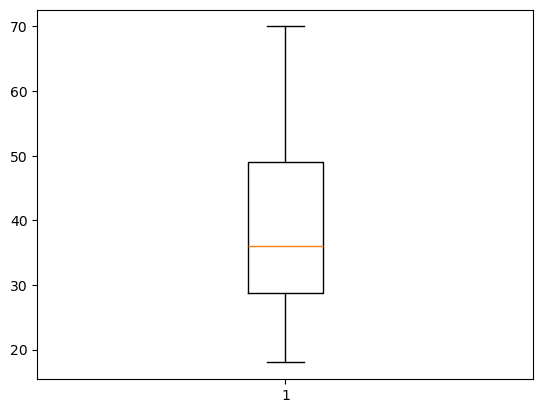

In [9]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4371f9f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4371fa540>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4371f9c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4371fab70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4371faea0>],
 'means': []}

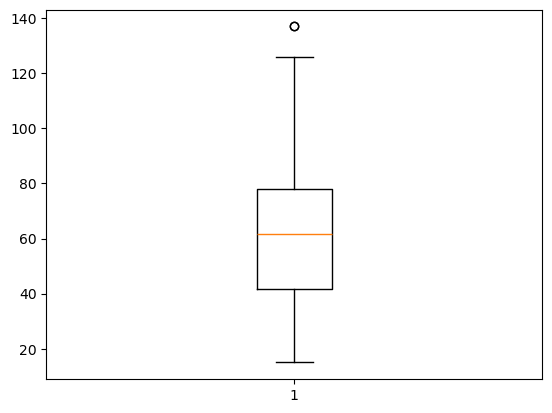

In [10]:
plt.boxplot(df['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d431f9d910>,
 'caps': [<matplotlib.lines.Line2D at 0x1d431f9df40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d431f9d730>],
 'medians': [<matplotlib.lines.Line2D at 0x1d431f9e510>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d431f9e810>],
 'means': []}

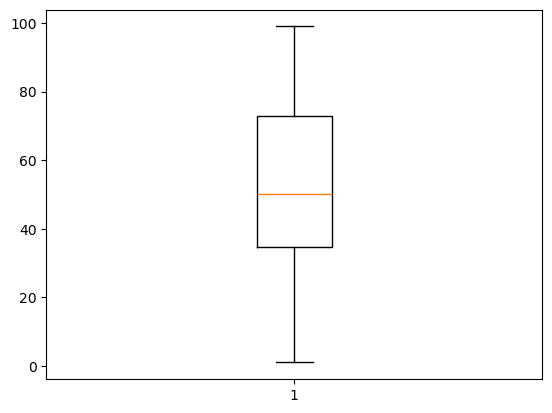

In [11]:
plt.boxplot(df['Spending Score (1-100)'])

# 4. Select the features for clustering

In [13]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# 5. Standardize the data

In [14]:
scaler = StandardScaler()

In [15]:
scaled_data = scaler.fit_transform(x)

In [16]:
pd.DataFrame(scaled_data,columns=x.columns)

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


# 6. Find the best number of clusters

In [17]:
wcss = []

for i in range(1,11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(x)
    wcss.append(model.inertia_)

C:\Users\91623\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91623\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91623\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91623\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'Elbow Metjod')

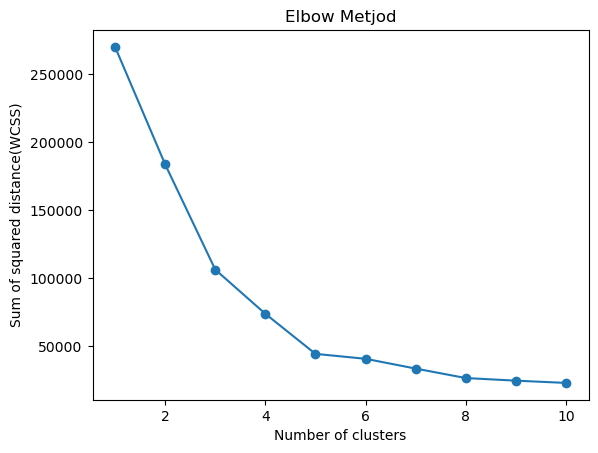

In [18]:
plt.plot(range(1,11),wcss,marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance(WCSS)')
plt.title('Elbow Metjod')

# 7. Apply K-Means Clustering

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_predict = kmeans.fit_predict(x)

C:\Users\91623\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 8. Visualize the clusters

In [30]:
x_array = x.values

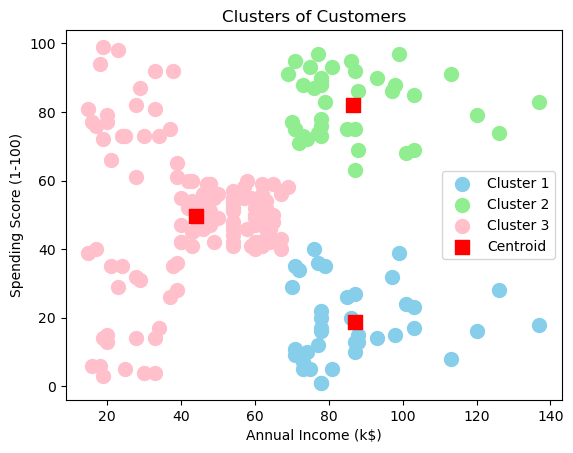

In [31]:
plt.scatter(x_array[y_predict==0,0], x_array[y_predict==0,1], s=100, c='skyblue', label='Cluster 1')
plt.scatter(x_array[y_predict==1,0], x_array[y_predict==1,1], s=100, c='lightgreen', label='Cluster 2')
plt.scatter(x_array[y_predict==2,0], x_array[y_predict==2,1], s=100, c='pink', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label='Centroid', marker='s')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()